Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


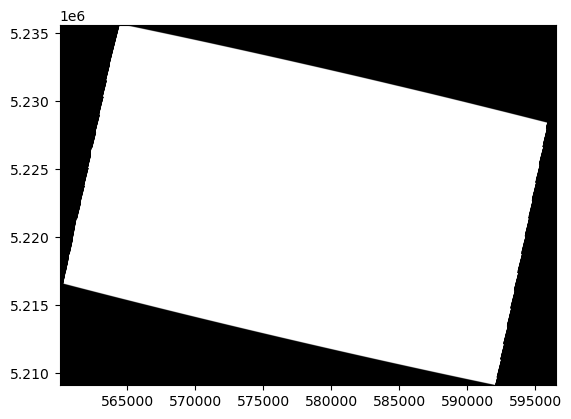

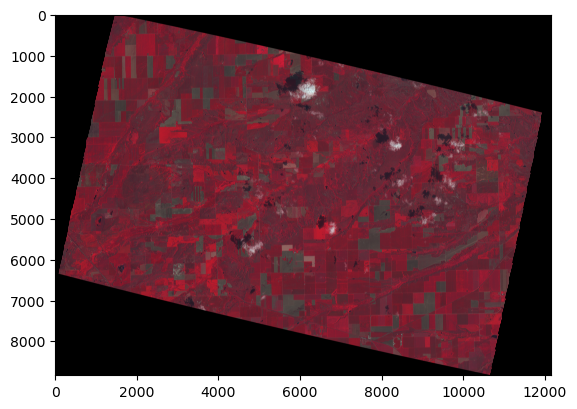

In [1]:
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
import rioxarray as rxr

# load tif file
raster = rasterio.open('/home/h99g576/anna-gphy484/anna-gphy484/files/PSScene/20230705_172241_41_2430/analytic_udm2/20230705_172241_41_2430_3B_AnalyticMS.tif')
show(raster)

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Convert to numpy arrays
nir = raster.read(4)
red = raster.read(3)
green = raster.read(2)

# Normalize band DN
nir_norm = normalize(nir)
red_norm = normalize(red)
green_norm = normalize(green)

# Stack bands
nrg = np.dstack((nir_norm, red_norm, green_norm))

# View the color composite
plt.imshow(nrg)

In [4]:
from rasterio.plot import show
from rasterio.transform import xy

# identify bounding box
bounds = raster.bounds
print("Bounds:", bounds)

Bounds: BoundingBox(left=560028.0, bottom=5209125.0, right=596496.0, top=5235618.0)


In [3]:
from pyproj import Transformer

# Set up transformer to WGS84 (lat/lon)
transformer = Transformer.from_crs(raster.crs, "EPSG:4326", always_xy=True)

# Transform each corner
lon_min, lat_min = transformer.transform(bounds.left, bounds.bottom)
lon_max, lat_max = transformer.transform(bounds.right, bounds.top)

print(f"Image extent in lat/lon:\n  Bottom-left: ({lat_min}, {lon_min})\n  Top-right: ({lat_max}, {lon_max})")

Image extent in lat/lon:
  Bottom-left: (47.03291768545681, -110.2099365005129)
  Top-right: (47.2669403488143, -109.72436751215083)


## NDVI

## Code graveyard

In [ ]:
#img.isel(band=0).plot()
#plt.show()

#red_band = red_band.squeeze()
#green_band = green_band.squeeze()
#blue_band = blue_band.squeeze()

# stack bands into 3D array
#rgb = np.stack((red_band, green_band, blue_band), axis = -1)

# normalize values to [0,1] range for display
#rgb = rgb.astype(np.float32)
#rgb /= 255

#if rgb.max() > 255:
    #rgb /= 65535
    
# plot

#img.plt()